### Library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import platform
import warnings
import pingouin as pg
from matplotlib import font_manager, rc
from scipy import stats
from scipy.stats import shapiro, f_oneway

In [3]:
warnings.filterwarnings('ignore')

path = '/library/Fonts/Arial Unicode.ttf'
if platform.system() == 'Darwin':
    print('Hangul OK in your MAC!')
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.. sorry')
plt.rcParams['axes.unicode_minus'] = False

Hangul OK in your MAC!


In [ ]:
# Data load
df = sns.load_dataset('tips') # tip 관련 데이터 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Normality 검정

In [18]:
num_df = df.select_dtypes(include=['number'])

for col in num_df.columns:
    shap, p_value = stats.shapiro(num_df[col])

    if p_value > 0.05:
        print(f"정규성 만족: {col}은 정규분포를 따른다.")
    else:
        print(f"정규성 불만족: {col}은 비정규분포를 따른다.")

정규성 불만족: total_bill은 비정규분포를 따른다.
정규성 불만족: tip은 비정규분포를 따른다.
정규성 불만족: size은 비정규분포를 따른다.


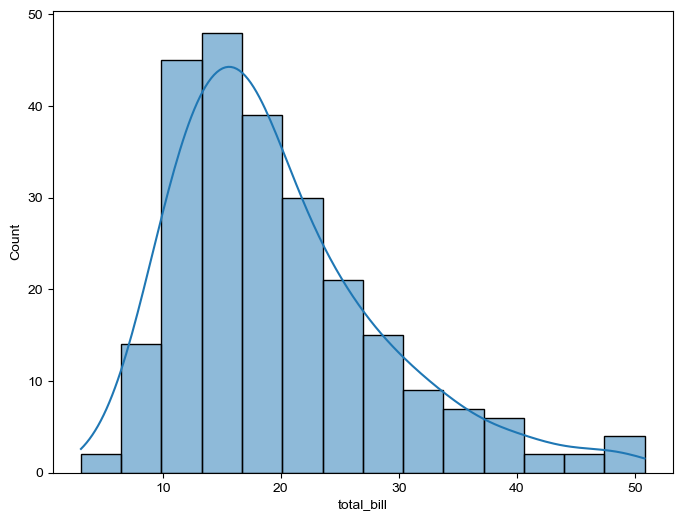

In [ ]:
# 시각화 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bill'], kde=True)
plt.show()

### T-검정

- 단일표본 t 검정
- 독립표본 t 검정

In [14]:
# 손님들이 주는 팁의 평균이 3달러 인가?
t_stat, p_value = stats.ttest_1samp(df['tip'], 3) # 단일표본 검정
print(f"T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value > 0.05:
    print(f"귀무가설 채택 → 평균 팁은 3달러와 유의한 차이가 없음 (P-value={p_value:.4f})")
else:
    print(f"귀무가설 기각 → 평균 팁은 3달러와 유의하게 다름 (P-value={p_value:.4f})")

T-stat: -0.0194, P-value: 0.9845
귀무가설 채택 → 평균 팁은 3달러와 유의한 차이가 없음 (P-value=0.9845)


In [13]:
# 흡연자와 비흡연자의 평균 팁 금액 차이가 있는가?
smokers = df[df['smoker'] == 'Yes']['tip'] # 흡연자
non_smokers = df[df['smoker'] == 'No']['tip'] # 비흡연자

t_stat, p_value = stats.ttest_ind(smokers, non_smokers) # 독립표본 t검정
print(f"T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value > 0.05:
    print(f"귀무가설 채택 → 흡연자와 비흡연자의 평균 팁에 유의한 차이 없음(P-value={p_value:.4f})")
else:
    print(f"귀무가설 기각 → 흡연자와 비흡연자의 평균 팁에 유의한 차이 있음(P-value={p_value:.4f})")

T-stat: 0.0922, P-value: 0.9266
귀무가설 채택 → 흡연자와 비흡연자의 평균 팁에 유의한 차이 없음(P-value=0.9266)


### ANOVA 검정

- One-way ANOVA(일원 분산분석)
- Two-way ANOVA(이원 분산분석)

In [22]:
# 점시과 저녁의 팁 차이가 있는가?
lunch = df[df['time'] == 'Lunch']['tip'] # 점심
dinner = df[df['time'] == 'Dinner']['tip'] # 저녁
stat, p_value = stats.f_oneway(lunch, dinner) # 일원 분산분석
print(f"Stat: {stat:.4f}, P-value: {p_value:.4f}")

if p_value > 0.05:
    print(f"귀무가설 채택 → 점심과 저녁의 팁에 유의한 차이 없음 (P-value={p_value:.4f})")
else:
    print(f"귀무가설 기각 → 점심과 저녁의 팁에 유의한 차이 있음 (P-value={p_value:.4f})")

Stat: 3.6338, P-value: 0.0578
귀무가설 채택 → 점심과 저녁의 팁에 유의한 차이 없음 (P-value=0.0578)


**해석**

| 항목    | 의미                                                         |
|---------|--------------------------------------------------------------|
| **SS**  | 제곱합 (Sum of Squares) → 각 요인이 설명하는 변동량         |
| **DF**  | 자유도 (Degree of Freedom)                                   |
| **MS**  | 평균제곱 (Mean Square) = SS / DF                             |
| **F**   | F-통계량 (요인의 영향력 크기 비교)                          |
| **p-unc** | p-value (유의확률)                                          |
| **np2** | eta-squared (효과크기, 설명력 비율)                          |

In [ ]:
# 성별과 요일에 따른 팁 차이가 있는가?
anova_result = pg.anova(dv='tip', between=['sex', 'day'], data=df) # 이원 분산분석
print(f"{anova_result}\n")

# 유의확률(p-value) 기준으로 해석
for i, row in anova_result.iterrows():
    factor = row['Source']
    
    if factor == 'Residual':  # Residual 스킵
        continue

    pval = row['p-unc']
    if pval > 0.05:
        print(f"귀무가설 채택 → '{factor}'에 따른 팁의 평균 차이는 유의하지 않음 (P-value={pval:.4f})")
    else:
        print(f"귀무가설 기각 → '{factor}'에 따른 팁의 평균 차이에 유의한 차이가 있음 (P-value={pval:.4f})")

      Source          SS     DF        MS         F     p-unc       np2
0        sex    1.594561    1.0  1.594561  0.833839  0.362097  0.003521
1        day    7.446900    3.0  2.482300  1.298061  0.275785  0.016233
2  sex * day    2.785891    3.0  0.928630  0.485606  0.692600  0.006135
3   Residual  451.306151  236.0  1.912314       NaN       NaN       NaN

귀무가설 채택 → 'sex'에 따른 팁의 평균 차이는 유의하지 않음 (P-value=0.3621)
귀무가설 채택 → 'day'에 따른 팁의 평균 차이는 유의하지 않음 (P-value=0.2758)
귀무가설 채택 → 'sex * day'에 따른 팁의 평균 차이는 유의하지 않음 (P-value=0.6926)


### 상관분석

- pearsonr
- spearmanr

In [28]:
# Pearson 상관분석 (선형 관계)
pearson_corr, pearson_p = stats.pearsonr(df['total_bill'], df['tip'])
print(f"상관계수: {pearson_corr:.4f}, P-value: {pearson_p:.4f}")

# 유의성 해석
if pearson_p > 0.05:
    print(f"귀무가설 채택 → 'total_bill'과 'tip' 사이에 선형 상관관계 없음 (P-value={pearson_p:.4f})")
else:
    print(f"귀무가설 기각 → 'total_bill'과 'tip' 사이에 선형 상관관계 있음 (P-value={pearson_p:.4f})")

상관계수: 0.6757, P-value: 0.0000
귀무가설 기각 → 'total_bill'과 'tip' 사이에 선형 상관관계 있음 (P-value=0.0000)


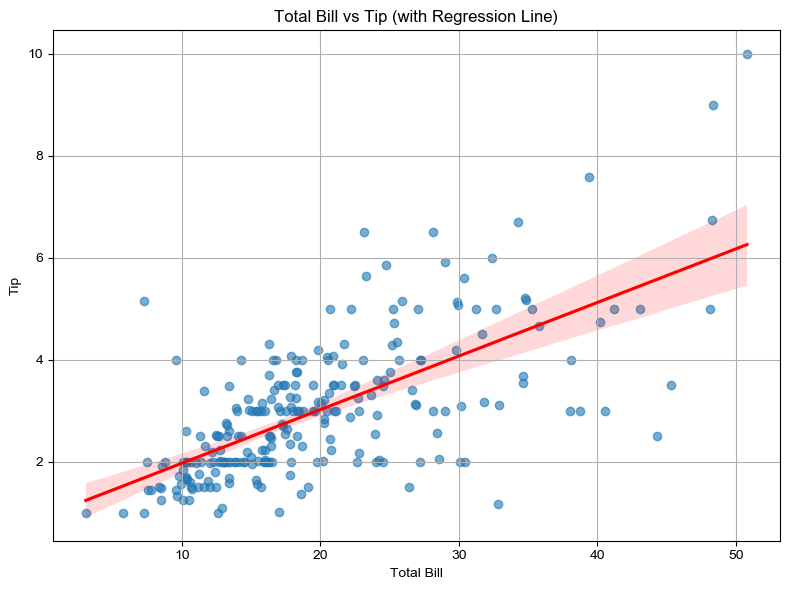

In [29]:
# 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.title("Total Bill vs Tip (with Regression Line)")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.grid(True)
plt.tight_layout()
plt.show()

- **Spearman 상관 분석**은 데이터의 순위를 기반으로 관계를 분석하는 **비모수 통계 기법**
- **시각화 시 회귀선을 그리지 않는 이유**는, 직선 회귀는 수치 간 선형 관계를 전제로 하기 때문
- 스피어만은 단조한 **순위** 관계를 보기 때문에 **선형 회귀선이 의미 없다.**


In [31]:
# Spearman 상관분석
spearman_corr, spearman_p = stats.spearmanr(df['total_bill'], df['tip'])
print(f"상관계수: {spearman_corr:.4f}, P-value: {spearman_p:.4f}")

# 유의성 판별
if spearman_p > 0.05:
    print(f"귀무가설 채택 → total_bill과 tip 간의 순위 상관은 유의하지 않음 (P-value={spearman_p:.4f})")
else:
    print(f"귀무가설 기각 → total_bill과 tip 간의 순위 상관에 유의한 관계가 있음 (P-value={spearman_p:.4f})")

상관계수: 0.6790, P-value: 0.0000
귀무가설 기각 → total_bill과 tip 간의 순위 상관에 유의한 관계가 있음 (P-value=0.0000)


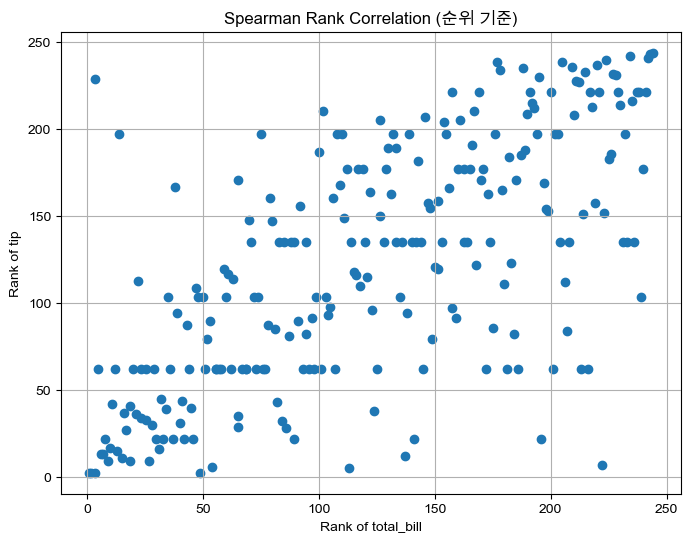

In [34]:
# 순위로 변환
df['rank_total_bill'] = df['total_bill'].rank()
df['rank_tip'] = df['tip'].rank()

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df['rank_total_bill'], df['rank_tip'])
plt.title('Spearman Rank Correlation (순위 기준)')
plt.xlabel('Rank of total_bill')
plt.ylabel('Rank of tip')
plt.grid(True)
plt.show()